# NeedleNet and error correction for microneedle project
by [Yang Liu](https://liuyang12.github.io), [MIT CSAIL](https://csail.mit.edu). Last updated Sep 30, 2021 

## NeedleNet as the vision system

In [48]:
# import external packages
import csv
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from reedmuller import reedmuller  # Reed-Muller code

%matplotlib inline  
%load_ext autoreload
%autoreload 2

# import internal packages
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

from predict import (load_needlenet, microneedle_array_from_raw_image)
from binnet import load_binnet, predict_binarization_from_raw_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [156]:
needle_size = 10 # side of the microneedle array 10x10 or 12x12
# needle_size = 12 # side of the microneedle array 10x10 or 12x12

# num_training = 100 # number of training samples *1k
num_training = 650 # number of training samples *1k
binnet_num_training = 900 # BinNet number of training samples *1k
binnet_suffix = ''
binnet_suffix = '_rect'
binnet_suffix = '_impulse'

known_patt_info = True # known pattern information from the filename '_PatternXX_'
patt_str = '_Pattern'  # substring in the filename

model  = f'../checkpoints/model_{needle_size}x{needle_size}_{num_training}k.pth'

# load pre-trained NeedleNet [only once]
needlenet = load_needlenet(model)

bin_method = 'binnet'
binnet_ckpt = f'../binnet/checkpoints/binnet{binnet_suffix}_{binnet_num_training}k.pth'
binnet = load_binnet(binnet_ckpt)

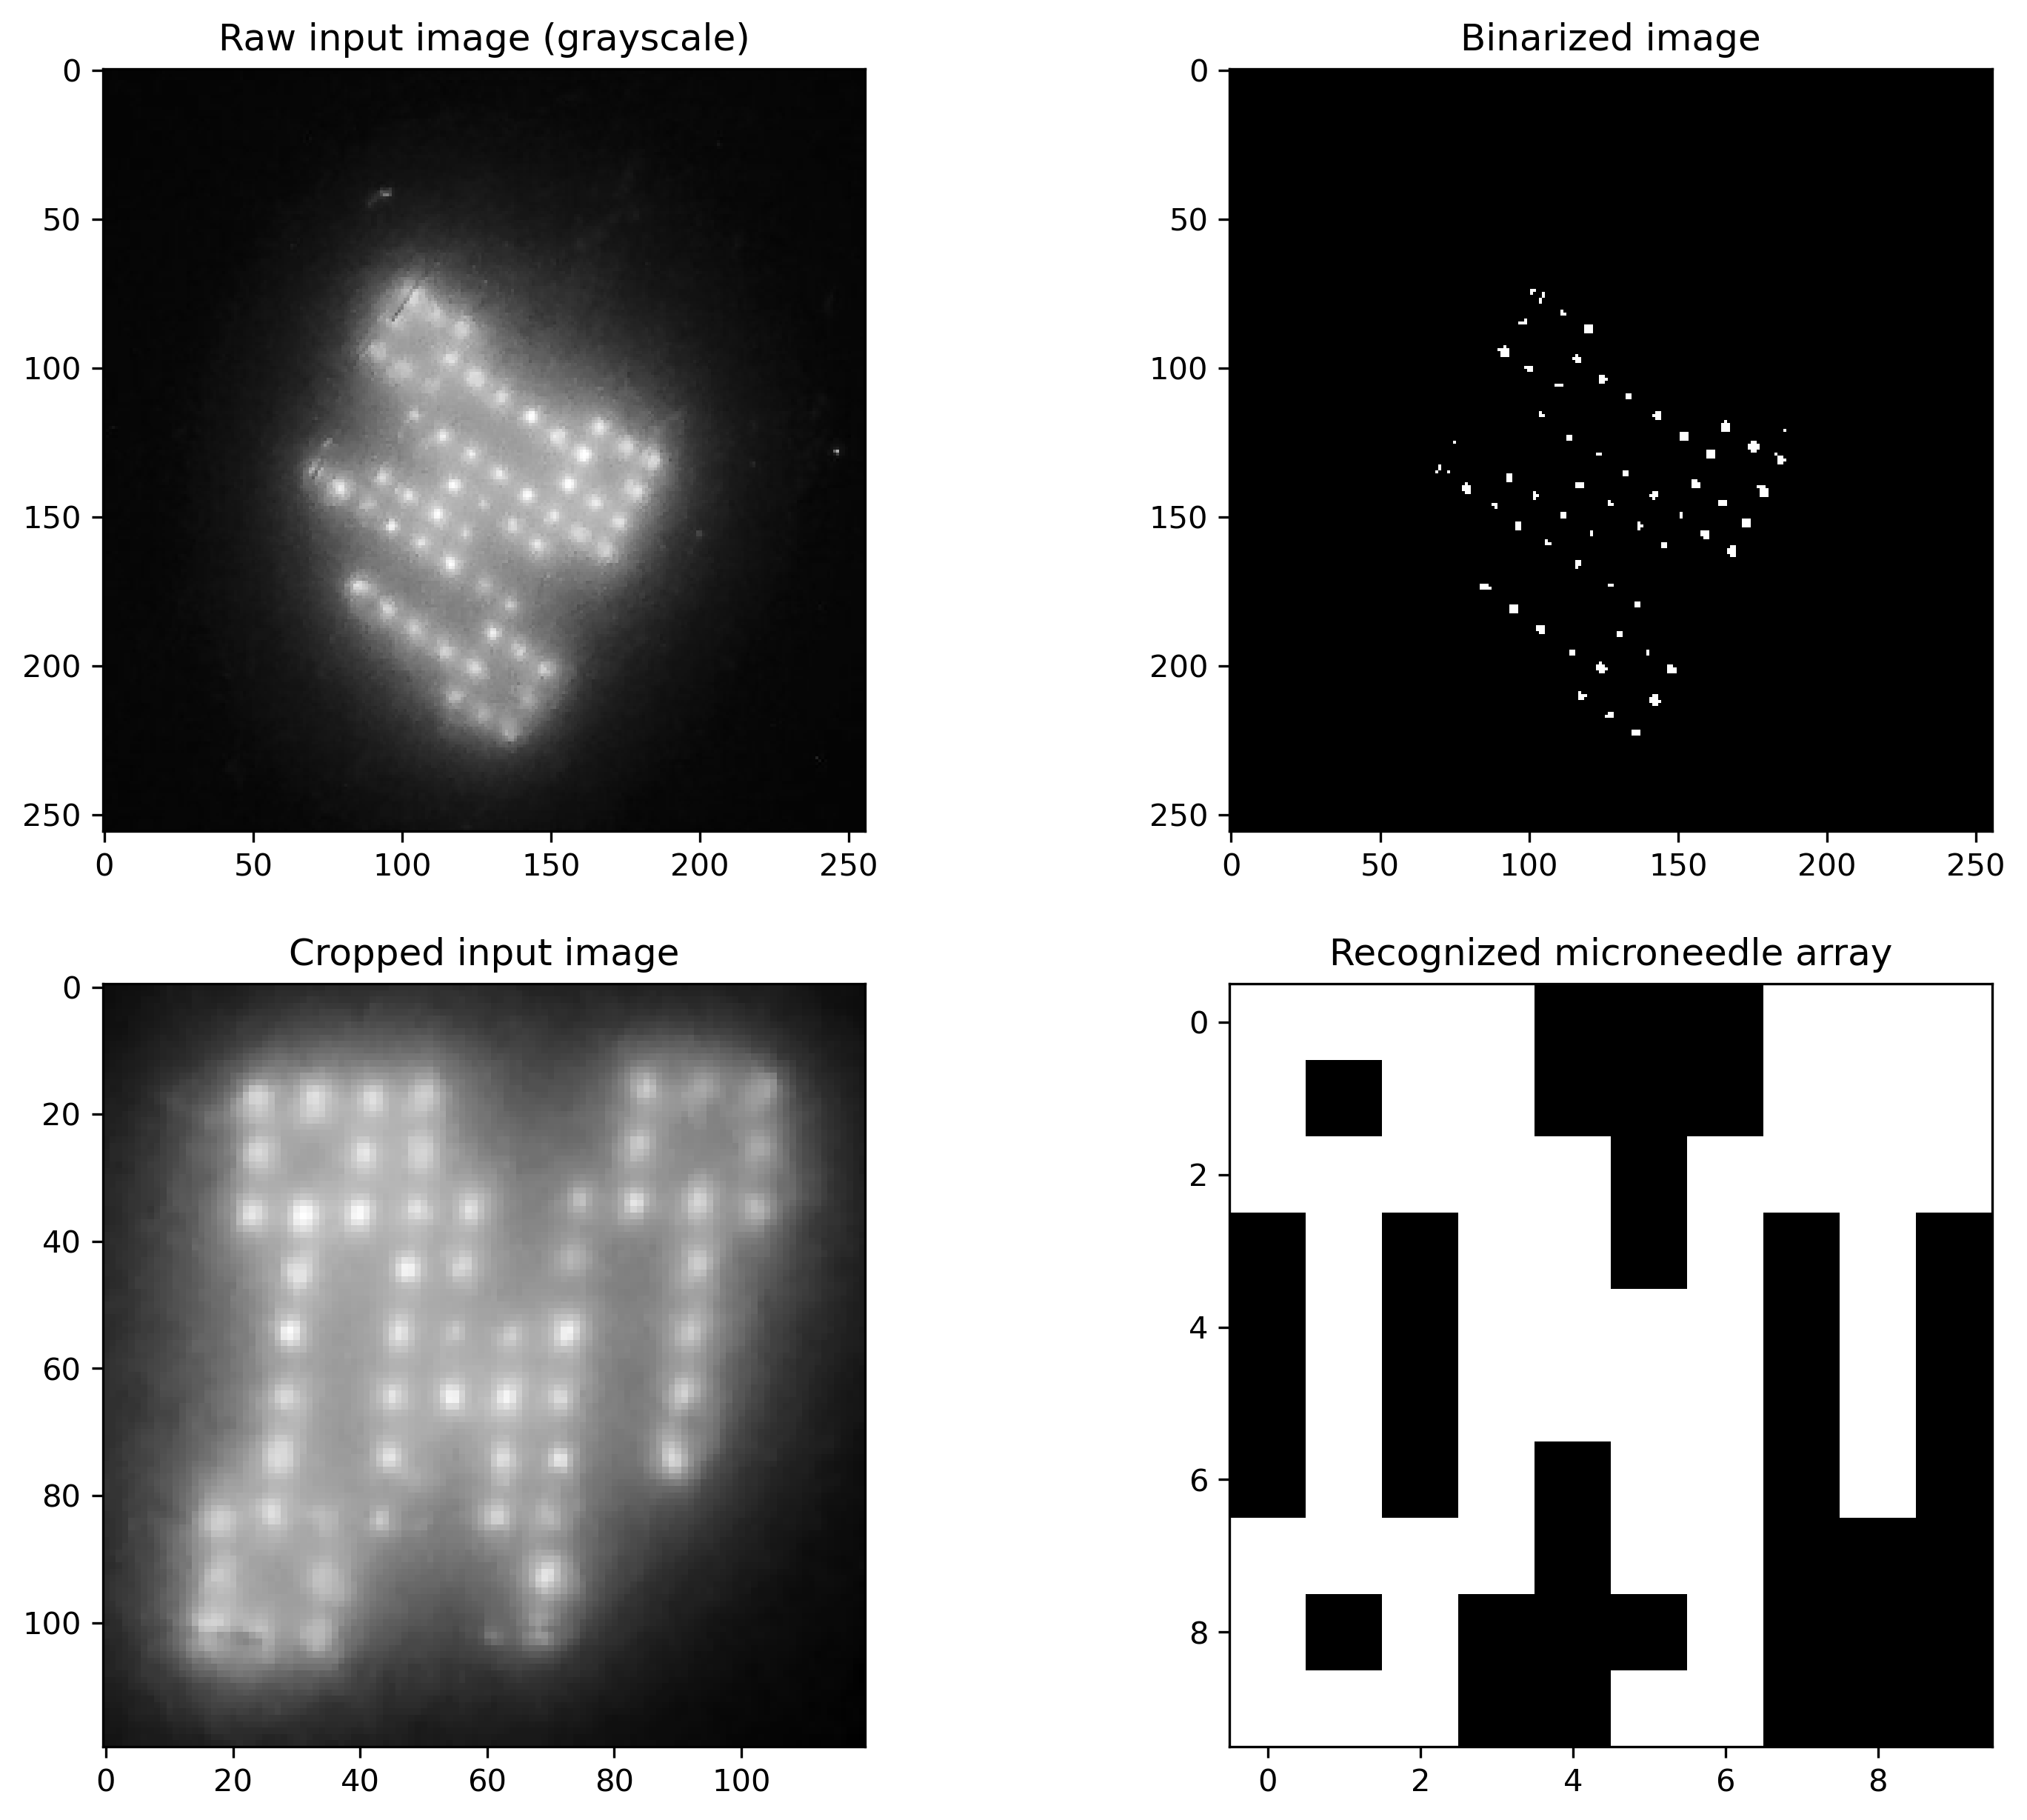

In [165]:
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/10x10 Pattern/Applicator 3/Day 16 - 07.22.21/TF_Pattern6_Con/LI.L.TF..22JULY2021_6.jpg"

# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/12x12 Pattern/12 x12_400um_1mm_App3/Day 8 -08.31.2021/Rum_L_BR_Pattern13/Rum.L.BR.Aug31.2021_24.jpg"
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/12x12 Pattern/12 x12_400um_1mm_App3/Day 23 - 09.15.2021/Rum_L_BR_Pattern13/Rum.L.BR.sept15.21_10.jpg"
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/12x12 Pattern/12 x12_400um_1mm_App3/Day 8 -08.31.2021/Rum_L_TF_Pattern11/Rum.L.TF.Aug31.2021_29.jpg"
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Dara-Azarenka/Pattern/Dara_Patterned_Dec9/Dara.right.3A.Dec9.2021_8.jpg"

# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/12x12 Pattern/12 x12_400um_1mm_App3/Day 38 - 09.30.2021/Rum_L_BR_Pattern13/Rum.L.BR.sept30.2021_6.jpg"

# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/Pig_Pattern_10x10/_Pattern4/LI-MP TF 4-day 64/LI.R.TF.august12.2021_12.jpg"
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/Pig_Pattern_10x10/_Pattern4/LI-MP TF 4-day 64/LI.R.TF.august12.2021_17.jpg"
imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/Pig_Pattern_10x10/_Pattern3/Dara- 3B- day 52/Dara.R.3B.jan21.2022_2.jpg"
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/Pig_Pattern_10x10/_Pattern3/Dara- 3B- day 52/Dara.R.3B.jan21.2022_4.jpg"
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/Pig_Pattern_10x10/_Pattern3/Dara- 3B- day 52/Dara.R.3B.jan21.2022_5.jpg"
# imfile = "/data/yliu/docs/Dropbox (MIT)/proj/microneedle/code/test_images/Dara.R.4A.Feb7.2022_6_rz.jpg"
# imfile = "/data/yliu/docs/Dropbox (MIT)/proj/microneedle/code/test_images/LI.R.TF.august12.2021_12_rz.jpg"
# imfile = "/data/yliu/docs/Dropbox (MIT)/proj/microneedle/code/test_images/Dara.R.3B.jan21.2022_4_rz.jpg"

imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/Pig_Pattern_10x10/_Pattern5/Dara- 5A- day 69/Dara.R.5A.Feb7.2022_12.jpg"
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/Pig_Pattern_10x10/_Pattern5/Dara- 5A- day 69/Dara.R.5A.Feb7.2022_15.jpg"
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/Pig_Pattern_10x10/_Pattern5/Dara- 5A- day 69/Dara.R.5A.Feb7.2022_23.jpg"
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/Pig_Pattern_10x10/_Pattern6/Garb- 6A- day 27/Garb.right.6A.4March22_6.jpg"
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/Pig_Pattern_10x10/_Pattern6/Garb- 6A- day 27/Garb.right.6A.4March22_11.jpg"
# imfile = "/data/yliu/proj/microneedle/Fail cases/Pig_96bits_Background noise/April 21/HTL-A/Low Brightness-HTLA/20220421T101347-ossaka_L.HTL_A_L-E25G25F30.png"

# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/Pig_96bits_Background noise/April 21/LTL-A/High Brightness-A/20220421T095808-ossaka_R_LTL_A_H-E25G25F30.png"
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/Pig_96bits_Background noise/April 21/LTL-A/High Brightness-A/20220421T095812-ossaka_R_LTL_A_H-E50G25F30.png"
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/Pig_96bits_Background noise/April 21/LTL-A/High Brightness-A/20220421T095826-ossaka_R_LTL_A_H-E25G25F15.png"
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/Pig_96bits_Background noise/April 21/LTL-A/High Brightness-A/20220421T095827-ossaka_R_LTL_A_H-E25G50F15.png"
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/Pig_96bits_Background noise/April 21/LTL-C/Medium Brightness-C/20220421T100257-ossaka.R.LTL.C.M-E25G25F30.png"
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/Pig_96bits_Background noise/April 21/LTL-C/Low Brightness-C/20220421T100417-ossaka.R.LTL.C.L-E100G100F30.png"

# Failure cases - 10x10 BinNet
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/10x10_binnet/_Pattern3/LI_Micropoint_Day27_070621_TR_Pyr/LI.R.TR.Jul6_21.jpg"
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/10x10_binnet/_Pattern3/LI_Micropoint_Day27_070621_TR_Pyr/LI.R.TR.Jul6_27.jpg"
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/10x10_binnet/_Pattern3/LI_Micropoint_Day36_071521_BF_Con/LI.Right1.bf2.15July21_12.jpg"
imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/10x10_binnet/_Pattern3/LI_Micropoint_Day36_071521_BF_Con/LI.Right1.bf2.15July21_22.jpg"

imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/10x10_binnet/_Pattern3/LI_Micropoint_Day54_080221_TR_Pyr/LI.R.TR.2Aug21_22.jpg"
imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/10x10_binnet/_Pattern3/LI_Micropoint_Day54_080221_TR_Pyr/LI.R.TR.2Aug21_12.jpg"

imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/10x10_binnet/_Pattern5/LI_App3_Day0_070621_BF_Pyr/LI.L.BF.Jul6_2.jpg" # partial success
imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/10x10_binnet/_Pattern5/LI_App3_Day0_070621_BF_Pyr/LI.L.BF.Jul6_3.jpg"
imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/10x10_binnet/_Pattern5/LI_App3_Day0_070621_BF_Pyr/LI.L.BF.Jul6_20.jpg"

# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/10x10_binnet/_Pattern5/LI_App3_Day0_070621_TR_Con/LI.L.TR.Jul6_8.jpg" # partial success
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/10x10_binnet/_Pattern5/LI_App3_Day0_070621_TR_Con/LI.L.TR.Jul6_8.jpg"
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/10x10_binnet/_Pattern5/LI_App3_Day0_070621_TR_Con/LI.L.TR.Jul6_20.jpg"

# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/10x10_binnet/_Pattern5/LI_App3_Day50_082521_TR_Con/LI.L.TR.25aug2021_12.jpg"
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/10x10_binnet/_Pattern5/LI_App3_Day50_082521_TR_Con/LI.L.TR.25aug2021_23.jpg"
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/Fail cases/10x10_binnet/_Pattern5/LI_App3_Day50_082521_TR_Con/LI.L.TR.25aug2021_30.jpg"

# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/pattern_new code/LI/LI Micropoint/Day 77 - 08.25.21 - last day/BR_Pattern4_pyr/LI.R.BR.25aug2021_12.jpg"

# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/pattern_new code/Garbine/3 feb 25 2022/_Pattern3/Garbine_right.3C.25Feb2022_4.jpg"
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/pattern_new code/Garbine/3 feb 25 2022/_Pattern3/Garbine_right.3C.25Feb2022_14.jpg"

# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/pattern_new code/LI/LI Micropoint/Day 77 - 08.25.21 - last day/BR_Pattern4_pyr/LI.R.BR.25aug2021_12.jpg"
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/pattern_new code/LI/LI Micropoint/Day 77 - 08.25.21 - last day/BR_Pattern4_pyr/LI.R.BR.25aug2021_30.jpg"
# imfile = "/data/yliu/docs/Dropbox (MIT)/Vaccine_Tracking2/Real Images/Real Images/Jooli's/pattern_new code/LI/LI Micropoint/Day 77 - 08.25.21 - last day/BR_Pattern4_pyr/LI.R.BR.25aug2021_29.jpg"

# predict binary microneedle array from the raw input image
im = cv.imread(imfile, 0)

center_crop = True
bin_size = (256,256)
im_filter_size = 0
H, W = im.shape
if center_crop and (H!=W):
    a = min(H,W)
    xc = (W - a) // 2
    yc = (H - a) // 2
    im = im[yc:yc+a, xc:xc+a]
if im.shape != bin_size:
    im = cv.resize(im, bin_size)
if im_filter_size > 0: # median filter to remove impulse noise (where BinNet is super sensitive)
    im_filter = cv.medianBlur(im, im_filter_size)
else:
    im_filter = im
    
# im_filter = randomerase(im_filter)[0].numpy()*255
im_bin = predict_binarization_from_raw_image(im_filter, binnet)
# needle, im_crop = microneedle_array_from_raw_image(im, needle_size, net=needlenet)
needle, im_crop = microneedle_array_from_raw_image(im, needle_size, net=needlenet, bin_method=bin_method, binnet=binnet)

plt.figure(figsize=(12,10),dpi=300)
plt.subplot(221)
plt.imshow(im_filter, cmap='gray')
plt.title('Raw input image (grayscale)')
plt.subplot(222)
plt.imshow(im_bin, cmap='gray')
plt.title('Binarized image')
plt.subplot(223)
plt.imshow(im_crop, cmap='gray')
plt.title('Cropped input image')
plt.subplot(224)
plt.imshow(needle, cmap='gray')
plt.title('Recognized microneedle array')
plt.show()

In [86]:
class addSaltandPepperNoise(object):
    '''
    Add `Salt-and`Pepper` impulse noise to image as a data augmentation transform
    '''
    def __init__(self, density:float=0.001, lower:float=5./255, upper:float=250./255):
        self.density = density
        self.lower   = lower
        self.upper   = upper
    
    def __call__(self, image):
        randmat = torch.rand(image.shape)
        image[randmat>=(1-self.density)] = self.upper
        image[randmat<=self.density]     = self.lower
        return image
    
    def __repr__(self):
        return self.__class__.__name__ + '(density={0}, lower={1}, upper={2})'.format(self.density, self.lower, self.upper)

(256, 256) 14 168


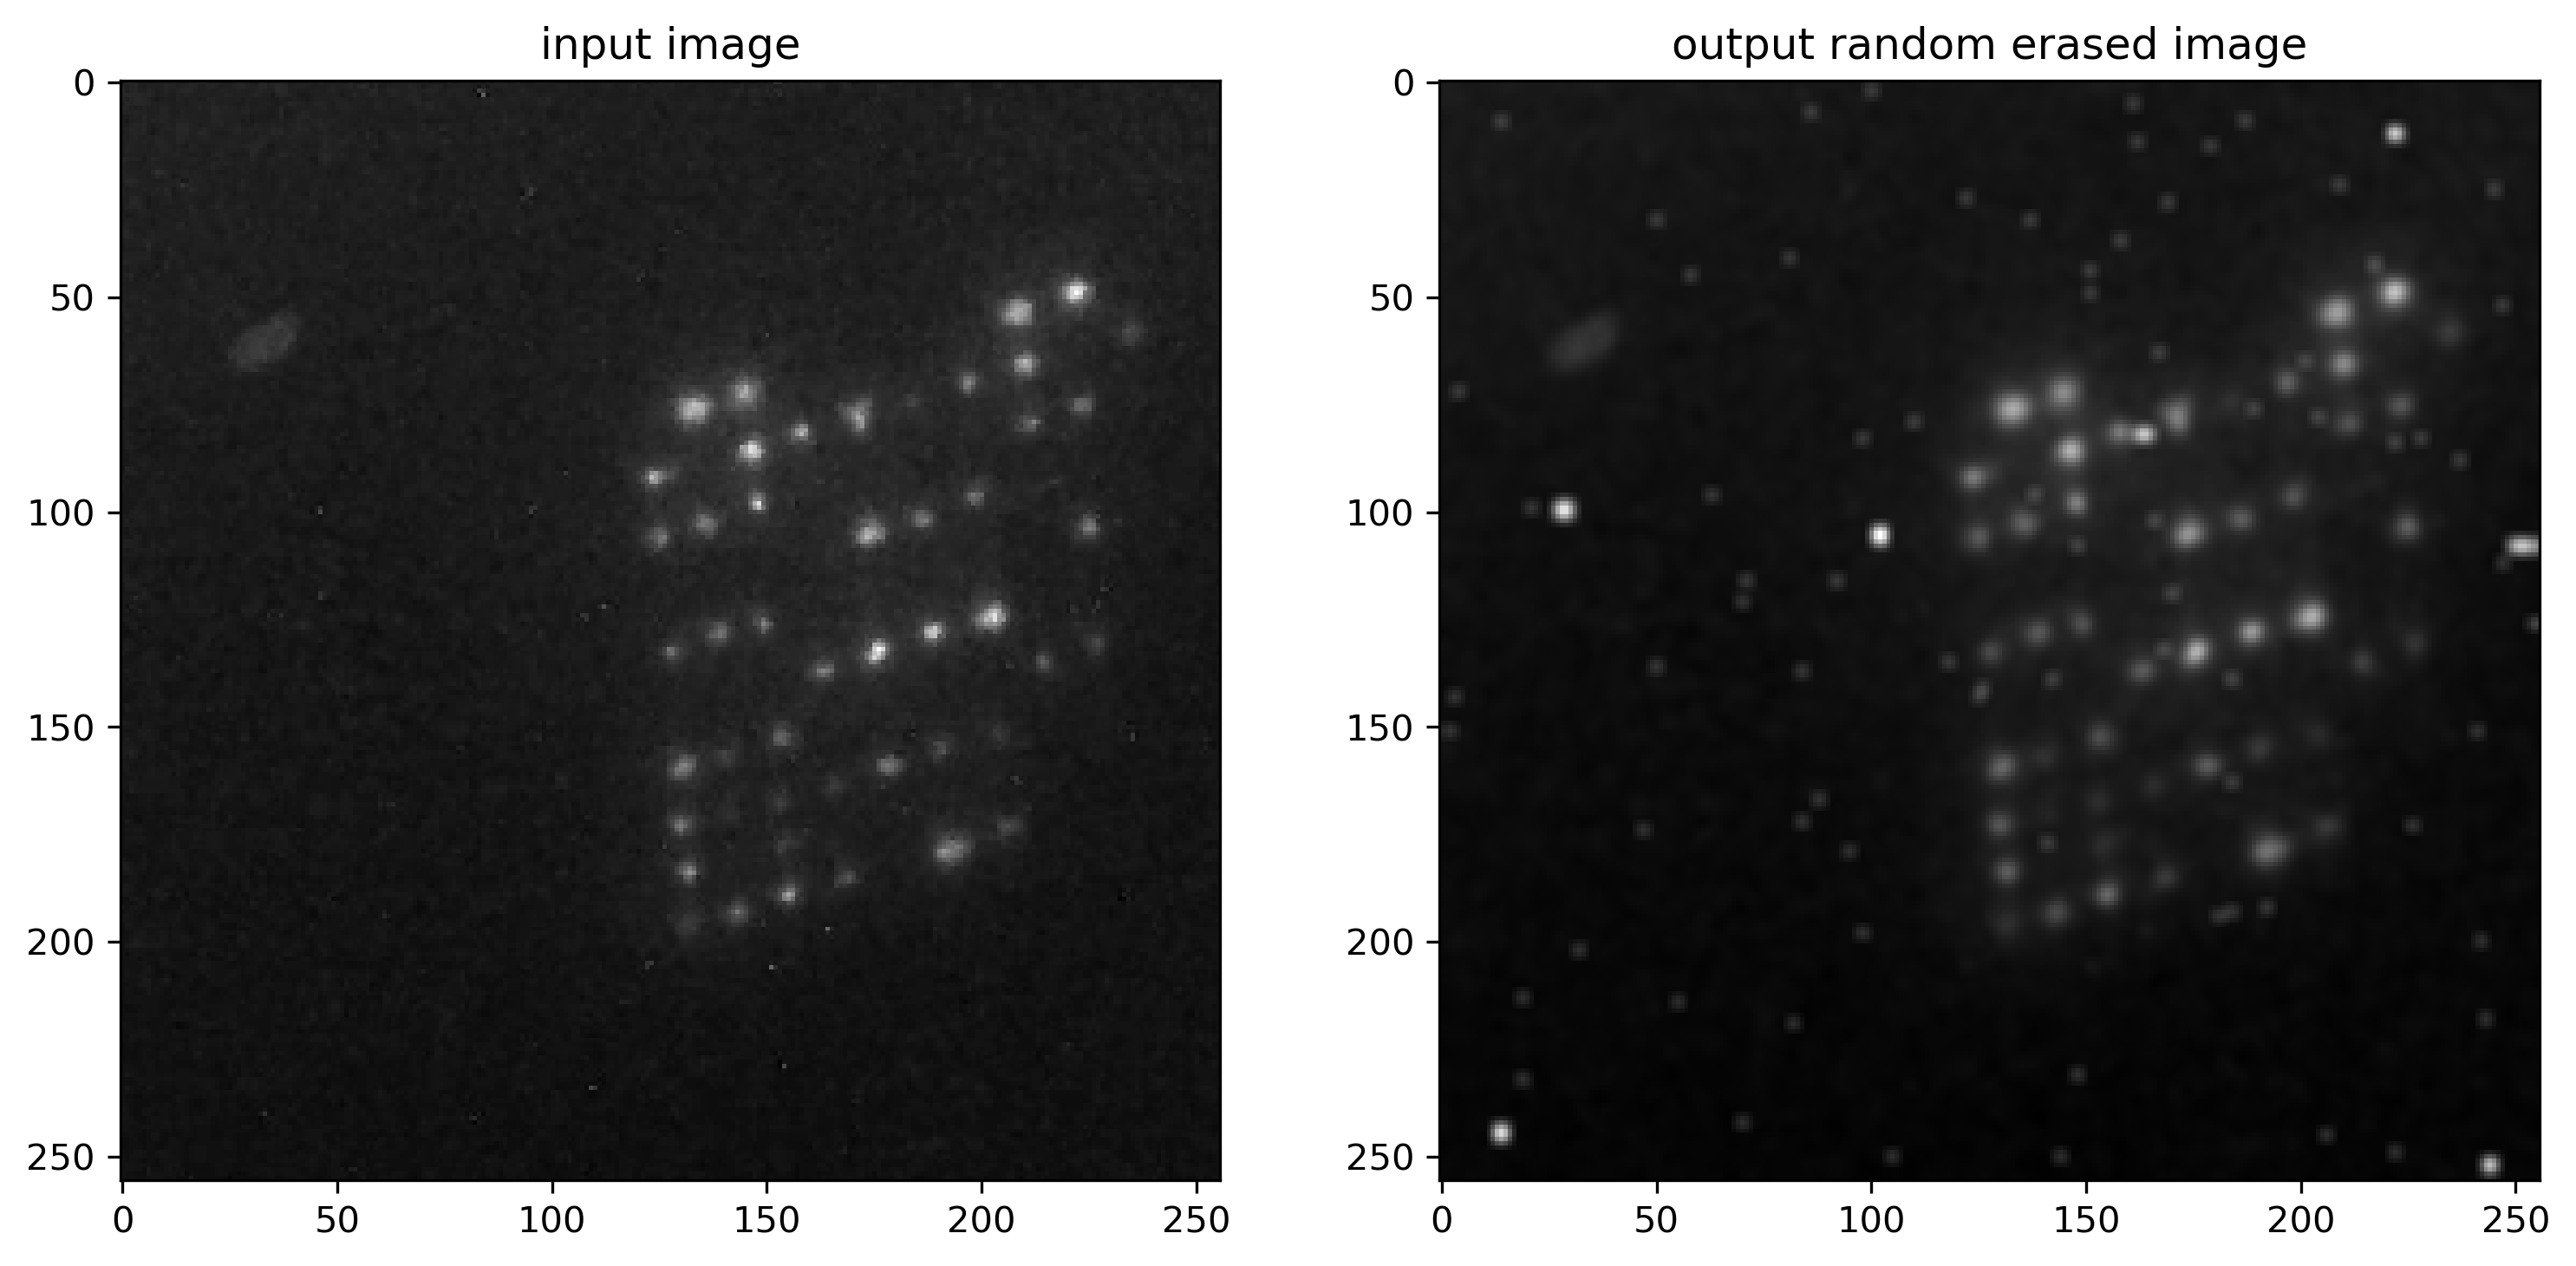

In [103]:
from random import uniform, randrange
from torchvision import transforms

sz = im_filter.size

randomerase = transforms.Compose([
    transforms.ToTensor(),
    addSaltandPepperNoise(),
    transforms.RandomErasing(p=.8,scale=(.1/sz,25./sz),ratio=(0.3,3.3),value=uniform(0.6,1)),
    transforms.RandomErasing(p=.8,scale=(.1/sz,25./sz),ratio=(0.3,3.3),value=uniform(0.6,1)),
    transforms.RandomErasing(p=.8,scale=(.1/sz,25./sz),ratio=(0.3,3.3),value=uniform(0.6,1)),
    transforms.RandomErasing(p=.8,scale=(.1/sz,25./sz),ratio=(0.3,3.3),value=uniform(0.6,1)),
    transforms.RandomErasing(p=.8,scale=(.1/sz,25./sz),ratio=(0.3,3.3),value=uniform(0.6,1)),
    transforms.RandomErasing(p=.8,scale=(.1/sz,25./sz),ratio=(0.3,3.3),value=uniform(0.6,1)),
    transforms.RandomErasing(p=.8,scale=(.1/sz,25./sz),ratio=(0.3,3.3),value=uniform(0.6,1)),
    transforms.RandomErasing(p=.8,scale=(.1/sz,25./sz),ratio=(0.3,3.3),value=uniform(0.6,1)),
    transforms.RandomErasing(p=.8,scale=(.1/sz,25./sz),ratio=(0.3,3.3),value=uniform(0.6,1)),
    transforms.RandomErasing(p=.8,scale=(.1/sz,25./sz),ratio=(0.3,3.3),value=uniform(0.6,1)),
    transforms.GaussianBlur(kernel_size=randrange(1,9,2),sigma=(0.1,3.0)),
])


print(im_filter.shape, im_filter.min(), im_filter.max())
im_erase = randomerase(im_filter).numpy()[0]

plt.figure(figsize=(12,10),dpi=300)
plt.subplot(121)
plt.imshow(im_filter, cmap='gray')
plt.title('input image')
plt.subplot(122)
plt.imshow(im_erase, cmap='gray')
plt.title('output random erased image')
plt.show()

In [25]:
print(im_erase.dtype, im_erase.shape, im_erase.min(), im_erase.max())

float32 (256, 256) 0.0 0.89030576


## Error-correction decoding and calculate the bit error rate (BER) according to decoded pattern
Note that we use the four corners for orientation detection and then get the right orientation of the pattern and finally include four corners in the bir error rate (BER) as well.

In [109]:
# [0] layout of the microneedle array
#     only use 64 bits for encoding RM(1,8) or [64,7,32]_2-code
if needle_size == 10:
    corner_size = 3
    corner_hole = True
    rm_order = 1
    use_mask = False
elif needle_size == 12:
    corner_size = 2
    corner_hole = False
    rm_order = 2
    use_mask = True
else:
    corner_size = 2
    corner_hole = False
    rm_order = 1
    use_mask = False

s = needle_size   # side of the microneedle array - s x s
p = corner_size   # preserved 4 corners for orientation (p x p top-right)

# [0.1] show a blank microneedle array with a template
blank = np.zeros((s,s), dtype=bool) # blank array with all zeros (binary 0/1 )
blank[0:p,0:p] = 1;   # top-left
blank[-p:,0:p] = 1;   # bottom-left
blank[0:p,-p:] = 1;   # top-right
blank[-p:,-p:] = 0;   # bottom-right 

if corner_hole:
    blank[ p//2, p//2] = 0;
    blank[-p//2, p//2] = 0;
    blank[ p//2,-p//2] = 0;

# [2] Reed-Muller encoder
totalbits = s*s - 4*p*p   # total number of bits for encoding

# [2.1] RM(r,m) code
r = rm_order                      # order of RM(r,m) code 
m = int(np.log2(totalbits))    # exponent of RM(r,m) code
rmcode = reedmuller.ReedMuller(r,m) # Reed-Muller RM(r,m) code
# first-order RM(1,m) code -- [n,k,d] or [2^m, m+1, 2^(m-r)]_2-code with 2^(m-r-1)-1 maximum error correction bits
n = rmcode.block_length()   # block length 2^m
k = rmcode.message_length() # message length m+1 (first-order)
ec = rmcode.strength()      # number of correctable error bits 2^(m-r-1)-1

print('            Bits used for encoding:  %2d bits' % n)
print('                      Message bits:  %2d bits' % k)
print('Maximum number of correctable bits:  %2d bits' % ec)

# [3.1] get the indices for encoding locations
idxmat  = np.arange(s*s).reshape(s,s) # all indices for each bit
idxmat[0:p,0:p] = -1   # top-left
idxmat[-p:,0:p] = -1   # bottom-left
idxmat[0:p,-p:] = -1   # top-right
idxmat[-p:,-p:] = -1   # bottom-right 
idxvec = idxmat[idxmat > 0]

            Bits used for encoding:  64 bits
                      Message bits:   7 bits
Maximum number of correctable bits:  15 bits


In [110]:
# load mask if using a mask for encoding
if use_mask:
    import scipy.io as sio
    maskfile = f'../checkpoints/mask_{needle_size}x{needle_size}.mat'
    if os.path.isfile(maskfile):
        data = sio.loadmat(maskfile)
        mask = data['mask']
        print(f'loaded mask file {maskfile}')
    else:
        # add a random bianry mask
        mask = np.random.randint(2, size=(s,s))
        mask[0:p,0:p] = 0;   # top-left
        mask[-p:,0:p] = 0;   # bottom-left
        mask[0:p,-p:] = 0;   # top-right
        mask[-p:,-p:] = 0;   # bottom-right 
        sio.savemat(maskfile,{'mask':mask})
        print(f'regenerated and saved mask file {maskfile}')

In [111]:
# flip the binary 
# noisyneedle = needle
noisyneedle = np.flip(needle,1).astype(int)

c1 = np.sum(noisyneedle[0:p,0:p])   # top-left
c2 = np.sum(noisyneedle[0:p,-p:])   # top-right
c3 = np.sum(noisyneedle[-p:,-p:])
c4 = np.sum(noisyneedle[-p:,0:p])   # bottom-left

rotnum = np.argmin([c1,c2,c3,c4]) + 2

noisyneedle = np.rot90(noisyneedle,rotnum)

In [112]:
# [2.2] translate the text message (vaccine type and date ) to binary bits
if needle_size == 10:
    # message length k = 7
    nbits = [1,2,4] # number of bits for each block
                  # [1-bit] type 1-2 (start from 1)
                  # [2-bit] year 1-4 (start from 1)
                  # [4-bit] month 1-12 (start from 1)
elif needle_size == 12:
    nbits = [4,4,14,3,4] # number of bits for each block
                  # [4-bit] type 1-16 (start from 1)
                  # [4-bit] manufacturer 1-16 (start from 1)
                  # [14-bit] LOT/batch 1-16384 (start from 1)
                  # [3-bit] year 1-8 (start from 1)
                  # [4-bit] month 1-12 (start from 1)
else:
    print('Specify number of bits for each block')

noisyneedle_mask = noisyneedle
if use_mask:
    noisyneedle = np.logical_xor(noisyneedle, mask)
    
noisycode = np.zeros(n)
for i in range(n):
    noisycode[i] = noisyneedle[idxvec[i]//s,idxvec[i]%s]

# [5] run Reed-Muller error correction decoding to get the formated message
y = rmcode.decode(noisycode)

if y is None:
    print('  Reed-Muller decoding failed.')
else:
    space = ''
    print('  Binary corrected bits:  %s' % space.join(map(str, y)))

    cumbits = np.cumsum(nbits)
    cumbits = np.append([0], cumbits)
    vinfo_dec = np.zeros([len(nbits), 1])
    text_dec = ''
    # decoded vaccine types and dates
    for ibit in range(len(nbits)):
        vinfo_dec[ibit] = int(space.join(
            map(str, y[cumbits[ibit]:cumbits[ibit+1]])), 2) + 1
        text_dec = text_dec + '%02d-' % vinfo_dec[ibit]

    text_dec = text_dec[:-1]
    print('  Decoded info: Vaccine %s' % (text_dec))

  Binary corrected bits:  1000001
  Decoded info: Vaccine 02-01-02


In [113]:
# get ground truth pattern information from filename '_PatternXX_'
success = True
patt_info = 'NA'
if known_patt_info:
    # load the pattern information csv file as a dictionary for queries
    with open('../checkpoints/pattern_info.csv', mode='r') as csvfile:
        reader = csv.reader(csvfile)
        patt_info_dict = {rows[0]: rows[1] for rows in reader}

    digit_idx = imfile.find(patt_str)
    if digit_idx > 0:
        if imfile[digit_idx+len(patt_str)+1].isdigit():
            patt_num = imfile[digit_idx+len(patt_str):digit_idx+len(patt_str)+2]
        else:
            patt_num = imfile[digit_idx+len(patt_str)]

        patt_info = patt_info_dict[patt_num]

        info = list(map(int, patt_info.split('-')))

        v = []
        for ibit in range(len(nbits)):
            binfo = list(map(int, '{0:0b}'.format(info[ibit]-1)))
            v = v + [0]*(nbits[ibit]-len(binfo)) + binfo

        success = (v == y)
    else:
        known_patt_info = False

  Number of error pixels: 19
  Bit error rate: 19.00%
  Number of info error pixels (excluding four 10x10 corners): 15
  Successful error correction!


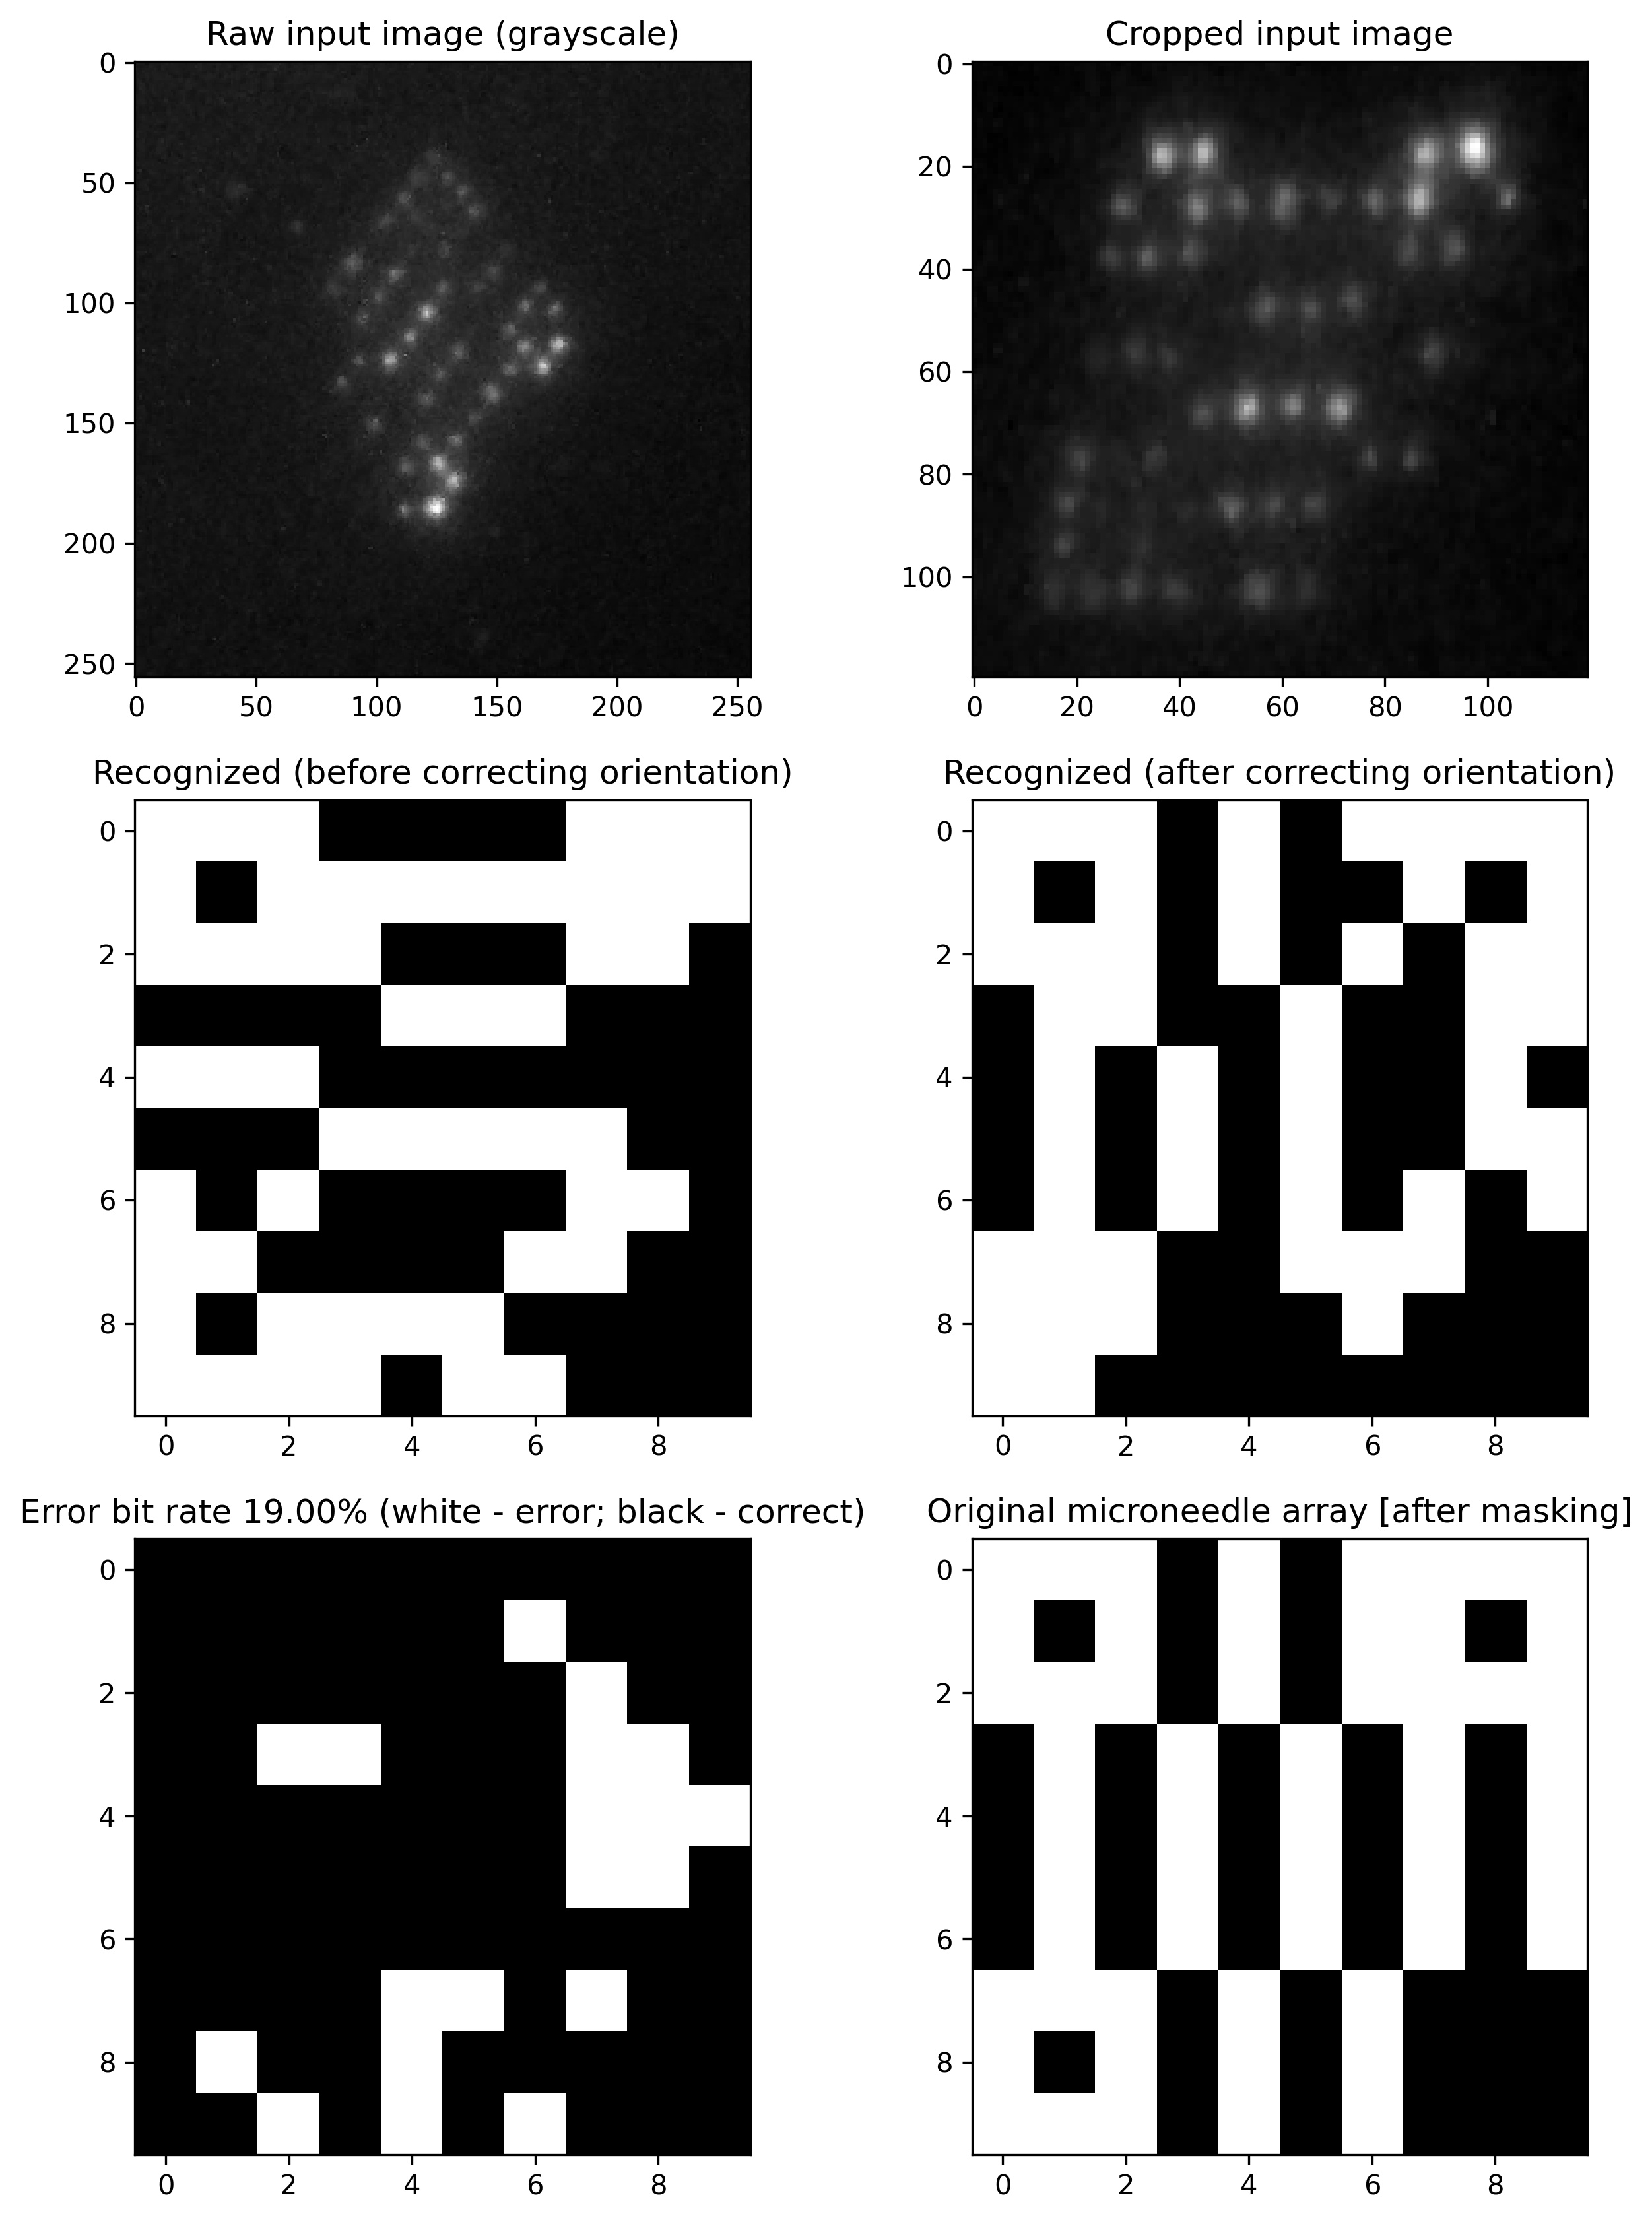

In [114]:
# [3.2] assign value to each bit in the microneedle
origneedle = blank.copy()

infomat = np.ones((s,s), dtype=bool) # blank array with all zeros (binary 0/1 )
infomat[0:p,0:p] = 0;   # top-left
infomat[-p:,0:p] = 0;   # bottom-left
infomat[0:p,-p:] = 0;   # top-right
infomat[-p:,-p:] = 0;   # bottom-right

# needle[idxvec] = code
if known_patt_info:
    origcode = rmcode.encode(v)
else:
    origcode = rmcode.encode(y)
for i in range(n):
    origneedle[idxvec[i]//s,idxvec[i]%s] = origcode[i]

origneedle_bk = origneedle
if use_mask:
    origneedle = np.logical_xor(origneedle, mask).astype(int)
    
errorneedle = noisyneedle_mask-origneedle.astype(int)

num_error_bits = np.count_nonzero(errorneedle) # number of flipped pixel bits
num_info_error_bits = np.count_nonzero(errorneedle*infomat) # number of flipped pixel bits

ber = num_error_bits/(s*s) # bit error rate
if not known_patt_info:
    success = (num_info_error_bits <= ec) # 

print('  Number of error pixels: %d' % num_error_bits)
print('  Bit error rate: {:.2%}'.format(ber))
print('  Number of info error pixels (excluding four %dx%d corners): %d' % (s,s,num_info_error_bits))
if success:
    print('  Successful error correction!')
else:
    print('  Error correction failed.')

plt.figure(figsize=(10,14),dpi=300)
plt.subplot(321)
plt.imshow(im, cmap='gray')
plt.title('Raw input image (grayscale)')
plt.subplot(322)
plt.imshow(im_crop, cmap='gray')
plt.title('Cropped input image')
plt.subplot(323)
plt.imshow(needle, cmap='gray')
plt.title('Recognized (before correcting orientation)')
plt.subplot(324)
plt.imshow(noisyneedle_mask, cmap='gray')
plt.title('Recognized (after correcting orientation)')
plt.subplot(326)
plt.imshow(origneedle, cmap='gray')
plt.title('Original microneedle array [after masking]')
plt.subplot(325)
plt.imshow(np.absolute(errorneedle), cmap='gray')
plt.title('Error bit rate {:.2%} (white - error; black - correct)'.format(ber))
plt.show()

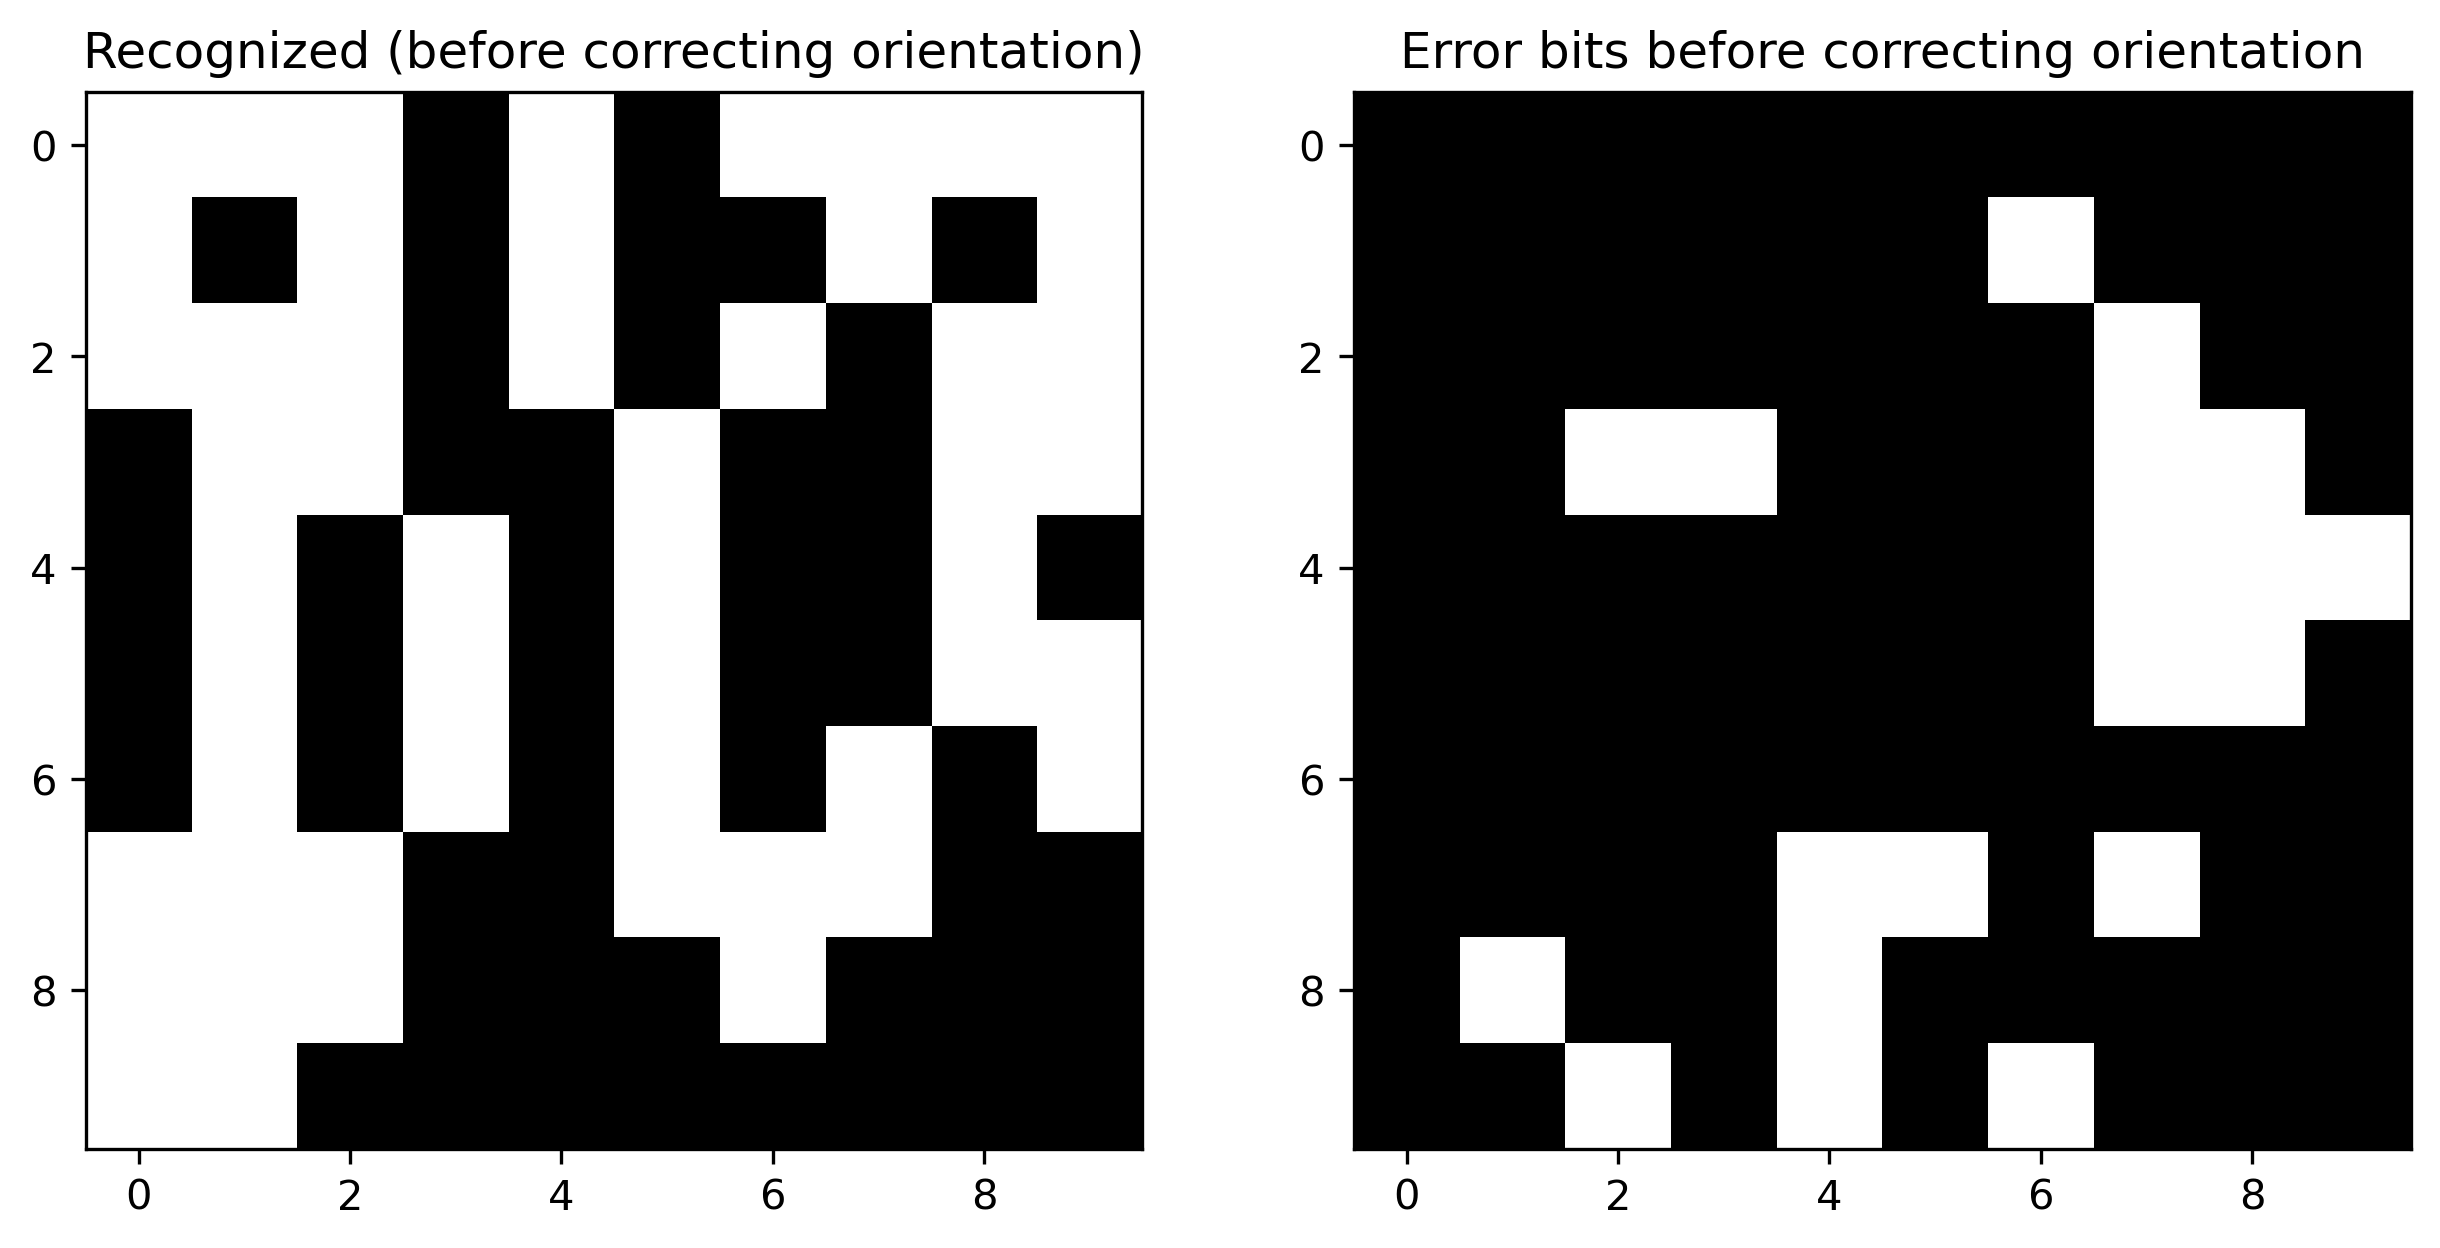

In [115]:
plt.figure(figsize=(10,14),dpi=300)
plt.subplot(121)
plt.imshow(noisyneedle, cmap='gray')
plt.title('Recognized (before correcting orientation)')
plt.subplot(122)
plt.imshow(np.absolute(noisyneedle-origneedle_bk.astype(int)), cmap='gray')
plt.title('Error bits before correcting orientation')
plt.show()